In [1]:
import numpy as np
import pandas as pd

In [2]:
Data=pd.read_csv('DS1_C4_S4_Test_Scores_Data_Practice.csv')

# TASK1

In [3]:
Data.student_id.is_unique

True

In [4]:
Data[Data.duplicated(keep='first')]

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch,pretest,posttest


In [5]:
#we didn't got a single result because student Id is unique for every students 

In [6]:
Data1 = Data.loc[:,Data.columns!='student_id'] # create a new dataframe removed the student id and got the duplicate rows.

In [7]:
x=Data1[Data1.duplicated(keep='first')] 
print("Duplicate rows in given data are: ", x.shape[0])
x


Duplicate rows in given data are:  79


,school,school_setting,school_type,classroom,teaching_method,gender,lunch,pretest,posttest
4,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify,64.0,76.0
19,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify,64.0,73.0
38,ANKYI,Urban,Non-public,ZNS,Standard,Female,Does not qualify,59.0,69.0
50,CCAAW,Suburban,Non-public,2B1,Experimental,Male,Qualifies for reduced/free lunch,59.0,74.0
106,CCAAW,Suburban,Non-public,PGK,Standard,Female,Does not qualify,73.0,80.0
...,...,...,...,...,...,...,...,...,...
2058,ZOWMK,Urban,Public,Q0E,Experimental,Female,Qualifies for reduced/free lunch,38.0,53.0
2067,ZOWMK,Urban,Public,Q0E,Experimental,Male,Qualifies for reduced/free lunch,37.0,53.0
2070,ZOWMK,Urban,Public,Q0E,Experimental,Female,Qualifies for reduced/free lunch,38.0,53.0
2080,ZOWMK,Urban,Public,QA2,Standard,Female,Qualifies for reduced/free lunch,45.0,51.0


# TASK2

In [8]:
Duplicate_Stu = Data1[Data1.duplicated(['school_type','teaching_method','pretest','posttest'], keep='first')]
print("Duplicate rows in given data on the basis of 'school_type','teaching_method','pretest' and 'posttest' are: ", Duplicate_Stu.shape[0])
Duplicate_Stu

Duplicate rows in given data on the basis of 'school_type','teaching_method','pretest' and 'posttest' are:  903


,school,school_setting,school_type,classroom,teaching_method,gender,lunch,pretest,posttest
4,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify,64.0,76.0
14,ANKYI,Urban,Non-public,6OL,Standard,Female,Does not qualify,64.0,77.0
19,ANKYI,Urban,Non-public,6OL,Standard,Male,Does not qualify,64.0,73.0
26,ANKYI,Urban,Non-public,ZNS,Standard,Female,Does not qualify,60.0,70.0
35,ANKYI,Urban,Non-public,ZNS,Standard,Female,Does not qualify,60.0,68.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,Male,Qualifies for reduced/free lunch,46.0,53.0


# TASK3

In [9]:
Data['pretest'].groupby(Data['school']).mean().sort_values(ascending=False).head(1)

school
UKPGS    78.453125
Name: pretest, dtype: float64

# TASK4

In [10]:
X=Data.pivot_table(index = 'school_setting', columns= 'gender',aggfunc = 'count',values = 'student_id' )
Fem=X.Female.min()
Male=X.Male.max()
A=X[X.Male==X.Male.max()].index.values[0]
B=X[X.Female==X.Female.min()].index.values[0]

print('Maximum number of Male student according to location are',Male,'present in', A,'area')
print('Maximum number of Female student according to location are',Fem,'present in', B,'area')
X


Maximum number of Male student according to location are 444 present in Urban area
Maximum number of Female student according to location are 228 present in Rural area


gender,Female,Male
school_setting,,
Rural,228,279
Suburban,368,348
Urban,456,444


# TASK5

In [11]:
min_score = Data['posttest'].groupby(Data['school']).min().sort_values(ascending=False).head(5)
max_score = Data['posttest'].groupby(Data['school']).max().sort_values(ascending=False).head(5)
min_score.name='Minimum Score'
max_score.name = 'Maximum Score'
type(min_score)

pandas.core.series.Series

In [12]:
pd.concat([min_score,max_score],axis=1)

,Minimum Score,Maximum Score
school,,
UKPGS,82.0,99.0
IDGFP,74.0,100.0
FBUMG,68.0,NaN
CCAAW,67.0,91.0
ZMNYA,66.0,95.0
UUUQX,NaN,91.0


# TASK6

In [13]:
avg_stu =Data['pretest'].groupby(Data['school']).mean().sort_values(ascending=False).head(5)
avg_stu


school
UKPGS    78.453125
IDGFP    75.202128
ZMNYA    68.130435
UUUQX    67.253012
CIMBB    65.067568
Name: pretest, dtype: float64

# TASK7

In [14]:
Data_scholar = dict(iter(Data.groupby('school')))['ANKYI'] #to get all the student from ANKYI school i used iter function
Scholar=Data_scholar['posttest']*100
Scholar.name='Scholarship'
FD=pd.concat([Data_scholar ,Scholar],axis=1)
FD[['student_id','Scholarship']]

,student_id,Scholarship
0,2FHT3,7200.0
1,3JIVH,7900.0
2,3XOWE,7600.0
3,556O0,7700.0
4,74LOE,7600.0
5,7YZO8,7400.0
6,9KMZD,7500.0
7,9USQK,7200.0
8,CS5QP,7700.0
9,D6HT8,7200.0


# TASK8

In [15]:
Data['lunch'] = Data['lunch'].replace({'Does not qualify':'No','Qualifies for reduced/free lunch':'Yes'})
Data

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,2FHT3,Female,No,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,3JIVH,Female,No,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,3XOWE,Male,No,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,556O0,Female,No,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,74LOE,Male,No,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,T8LSK,Female,No,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,VNP26,Female,Yes,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,YDR1Z,Female,Yes,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,YUEIH,Male,Yes,46.0,53.0


# TASK9

In [16]:
Data.pivot_table(index = 'school_setting', columns= 'teaching_method',aggfunc = 'count',values = 'school' )

teaching_method,Experimental,Standard
school_setting,,
Rural,201,309
Suburban,284,433
Urban,275,631


# TASK10

In [17]:
Data.loc[Data['posttest'] <39, 'pretest'] = 135

In [18]:
Data.loc[Data['posttest'] <39] #to cross check

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch,pretest,posttest
728,GOOBU,Urban,Public,CXC,Standard,JX5I4,Female,Yes,135.0,36.0
740,GOOBU,Urban,Public,HKF,Standard,78IT6,Female,Yes,135.0,32.0
742,GOOBU,Urban,Public,HKF,Standard,8BONX,Male,Yes,135.0,38.0
745,GOOBU,Urban,Public,HKF,Standard,ESWTA,Male,Yes,135.0,38.0
746,GOOBU,Urban,Public,HKF,Standard,ET5M9,Female,Yes,135.0,35.0
751,GOOBU,Urban,Public,HKF,Standard,LTIOX,Male,Yes,135.0,34.0
1010,KZKKE,Rural,Public,3D0,Standard,EOZV5,Female,Yes,135.0,36.0
1012,KZKKE,Rural,Public,3D0,Standard,GFVOX,Female,Yes,135.0,37.0
1023,KZKKE,Rural,Public,3D0,Standard,RHOL5,Male,Yes,135.0,37.0
1024,KZKKE,Rural,Public,3D0,Standard,T1N79,Female,Yes,135.0,38.0


# TASK11

In [19]:
X=Data.pivot_table(index = 'school_setting', columns= 'gender',aggfunc = 'mean',values = 'posttest' )#
Suburban_Avg=X.loc['Suburban','Male']
Urban_Avg=X.loc['Urban','Male']
A=Suburban_Avg-Urban_Avg
B=(Suburban_Avg+Urban_Avg)/2
RD=A/B*100
print('Relative percentage difference of suburban and urban areas are: ',round(RD,2))

Relative percentage difference of suburban and urban areas are:  19.54


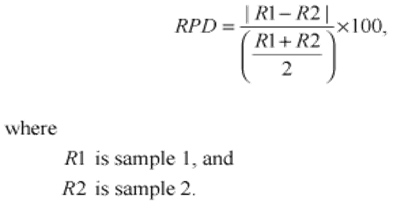

# TASK12

In [20]:
Data.isnull().sum() #to crosscheck if there is any null values available in DataSet

school              0
school_setting      0
school_type         0
classroom           0
teaching_method     0
student_id          0
gender             10
lunch               0
pretest             4
posttest            4
dtype: int64

In [21]:
Data['gender'] = Data['gender'].fillna(Data['gender'].mode().loc[0]) 
Data['pretest'] = Data['pretest'].fillna(Data['pretest'].mean() ) 
Data['posttest'] = Data['posttest'].fillna(Data['posttest'].mean() ) 

In [22]:
Data.isnull().sum() # AS WE CAN CLEARLY SEE THERE IS NOMORE NULL VALUES AVAILABLE IN THE DATASET

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64